#### Grouping Using K means Clustering

In [56]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Tickers list
# tickers = [
#     "BTC-USD", "ETH-USD", "BNB-USD", "XRP-USD", "SOL-USD",
#     "ADA-USD", "DOGE-USD", "AVAX-USD", "DOT-USD", "MATIC-USD",
#     "SHIB-USD", "TRX-USD", "LTC-USD", "LINK-USD", "XLM-USD",
#     "APT-USD", "INJ-USD", "OP-USD"
# ]
# tickers = [
#     "BTC-USD", "ETH-USD", "BNB-USD", "XRP-USD", "SOL-USD",
#     "ADA-USD", "DOGE-USD", "AVAX-USD", "DOT-USD", "MATIC-USD",]


tickers = [
     "BNB-USD", "SOL-USD",
    "ADA-USD", "DOGE-USD", "AVAX-USD", "DOT-USD", "MATIC-USD",
    "SHIB-USD", "TRX-USD", "LTC-USD", "LINK-USD", "XLM-USD",
    "APT-USD", "INJ-USD", "OP-USD"
]


# Download historical data
def get_crypto_data(tickers, start="2024-07-01", end="2025-07-20"):
    return yf.download(tickers, start=start, end=end, group_by='ticker', interval="1d", auto_adjust=False)

raw_data = get_crypto_data(tickers)

# Feature extraction
feature_dict = {}

for ticker in tickers:
    try:
        df = raw_data[ticker].copy()
        df.dropna(inplace=True)

        # Daily percentage change
        df["Daily % Change"] = df["Close"].pct_change() * 100

        # Volatility (std of daily returns)
        volatility = df["Daily % Change"].std()

        # Rate of Change (10-day)
        df["ROC"] = df["Close"].pct_change(periods=10) * 100
        roc_mean = df["ROC"].mean()

        # RSI (14-day)
        delta = df["Close"].diff()
        gain = delta.clip(lower=0)
        loss = -delta.clip(upper=0)
        avg_gain = gain.rolling(window=14).mean()
        avg_loss = loss.rolling(window=14).mean()
        rs = avg_gain / avg_loss
        rsi = 100 - (100 / (1 + rs))
        avg_rsi = rsi.mean()

        # Average volume
        avg_volume = df["Volume"].mean()

        feature_dict[ticker] = {
            "Daily % Change": df["Daily % Change"].mean(),
            "Volatility": volatility,
            "ROC": roc_mean,
            "RSI": avg_rsi,
            "Volume": avg_volume
        }

    except Exception as e:
        print(f"Error processing {ticker}: {e}")

# Create DataFrame
features = pd.DataFrame(feature_dict).T.dropna()

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# KMeans Clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
features["Cluster"] = kmeans.fit_predict(X_scaled)

# # 2D Visualization using first 2 features
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=features, x="Daily % Change", y="Volatility", hue="Cluster", palette="Set2", s=100)
# for i in features.index:
#     plt.text(features.loc[i, "Daily % Change"], features.loc[i, "Volatility"], i, fontsize=9)
# plt.title("K-Means Clustering of Cryptos (Daily % Change vs Volatility)")
# plt.grid(True)
# # plt.show()

# Print cluster members
for i in range(k):
    print(f"\nCluster {i}:")
    print(features[features["Cluster"] == i].index.tolist())


[*********************100%***********************]  15 of 15 completed



Cluster 0:
['ADA-USD', 'DOGE-USD', 'TRX-USD', 'LTC-USD', 'LINK-USD', 'XLM-USD']

Cluster 1:
['BNB-USD', 'SOL-USD']

Cluster 2:
['AVAX-USD', 'DOT-USD', 'MATIC-USD', 'SHIB-USD', 'APT-USD', 'INJ-USD', 'OP-USD']


In [57]:
for i in range(k):
    members = features[features["Cluster"] == i].index.tolist()
    print(f"\nCluster {i} Members: {members}")



Cluster 0 Members: ['ADA-USD', 'DOGE-USD', 'TRX-USD', 'LTC-USD', 'LINK-USD', 'XLM-USD']

Cluster 1 Members: ['BNB-USD', 'SOL-USD']

Cluster 2 Members: ['AVAX-USD', 'DOT-USD', 'MATIC-USD', 'SHIB-USD', 'APT-USD', 'INJ-USD', 'OP-USD']


In [58]:
for i in range(k):
    print(f"\n🔹 Cluster {i}")
    print("Members:", features[features["Cluster"] == i].index.tolist())
    print("Feature Averages:")
    print(features[features["Cluster"] == i].mean().round(2))



🔹 Cluster 0
Members: ['ADA-USD', 'DOGE-USD', 'TRX-USD', 'LTC-USD', 'LINK-USD', 'XLM-USD']
Feature Averages:
Daily % Change    3.300000e-01
Volatility        5.350000e+00
ROC               3.590000e+00
RSI               5.152000e+01
Volume            1.009895e+09
Cluster           0.000000e+00
dtype: float64

🔹 Cluster 1
Members: ['BNB-USD', 'SOL-USD']
Feature Averages:
Daily % Change    1.200000e-01
Volatility        3.550000e+00
ROC               1.180000e+00
RSI               5.197000e+01
Volume            3.021803e+09
Cluster           1.000000e+00
dtype: float64

🔹 Cluster 2
Members: ['AVAX-USD', 'DOT-USD', 'MATIC-USD', 'SHIB-USD', 'APT-USD', 'INJ-USD', 'OP-USD']
Feature Averages:
Daily % Change   -6.000000e-02
Volatility        5.060000e+00
ROC              -6.800000e-01
RSI               4.620000e+01
Volume            2.464506e+08
Cluster           2.000000e+00
dtype: float64


#### Grouping using Correlation

[*********************100%***********************]  7 of 7 completed
C:\Users\luvra\AppData\Local\Temp\ipykernel_16296\4263452537.py:17: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = close_prices.pct_change().dropna()


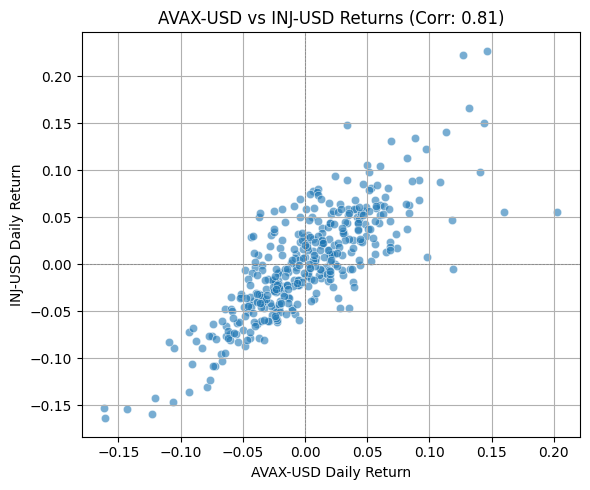

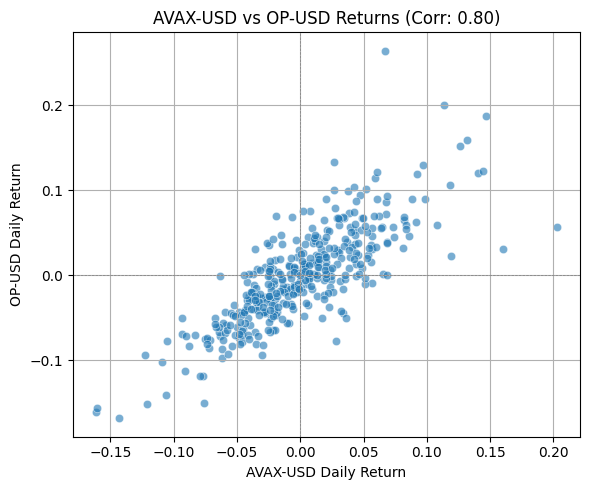

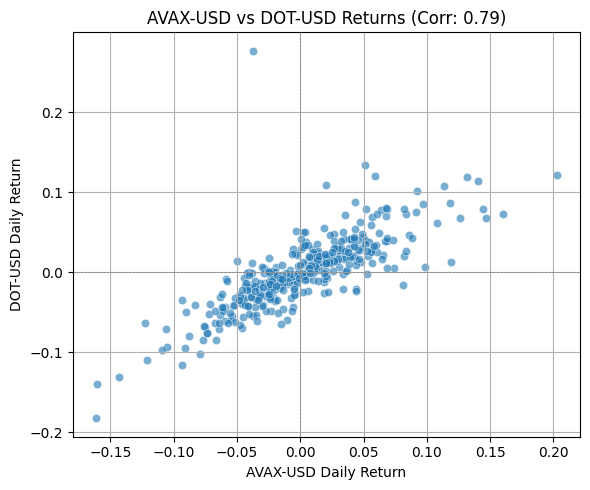

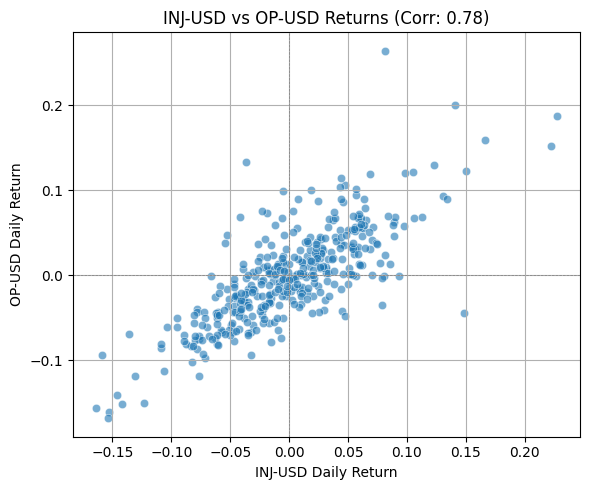

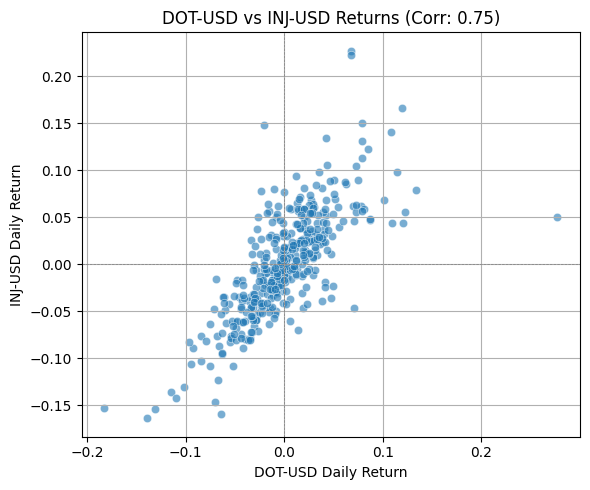

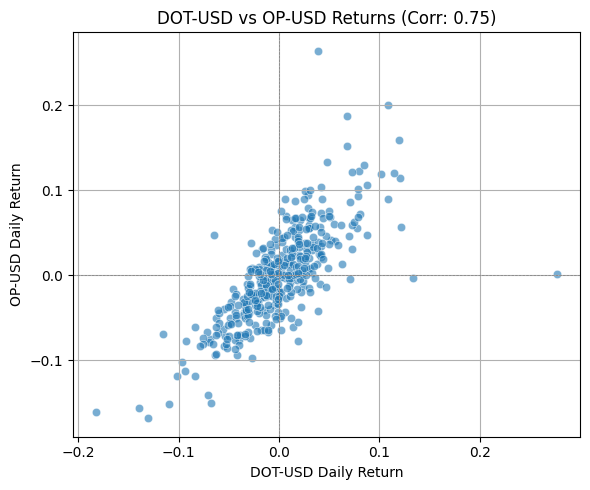

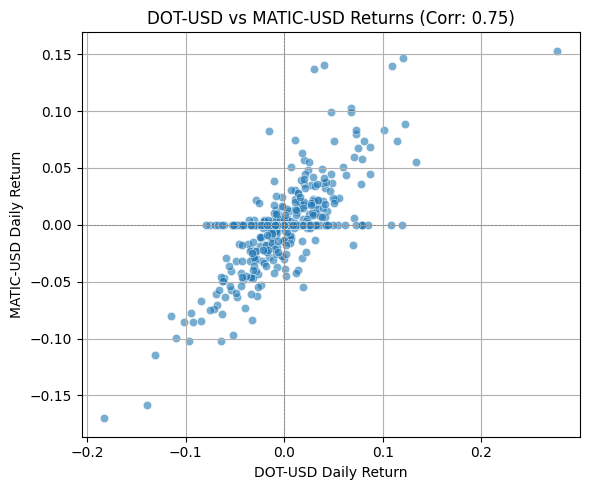

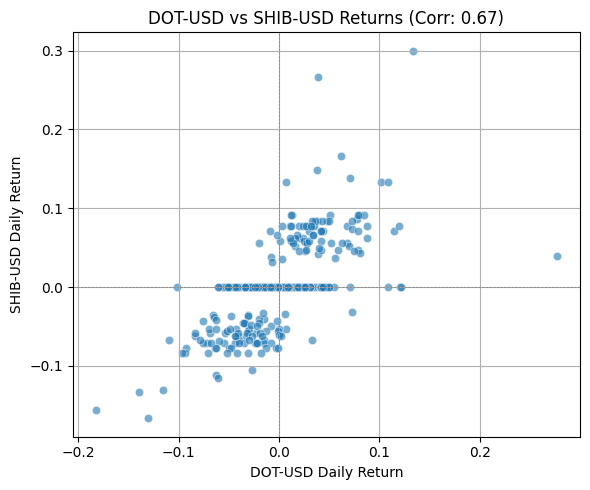

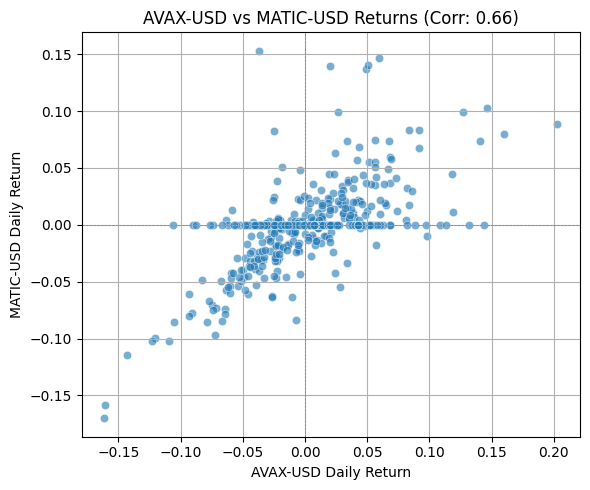

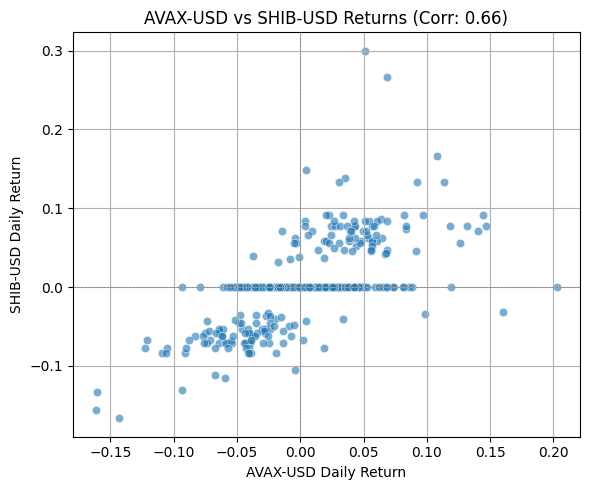

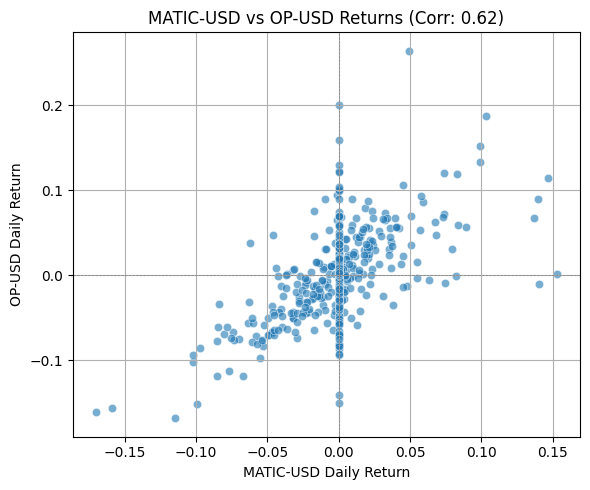

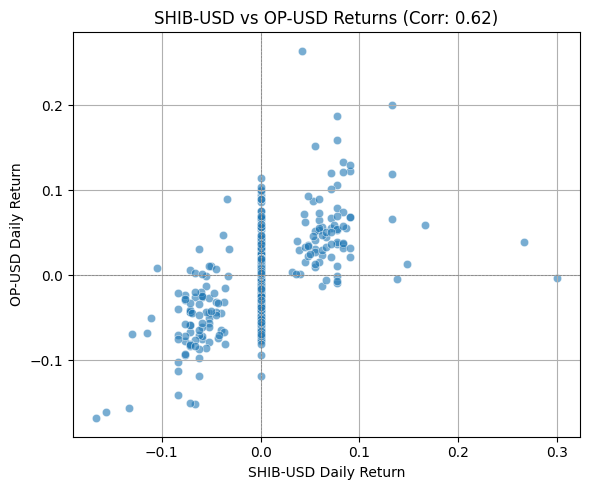

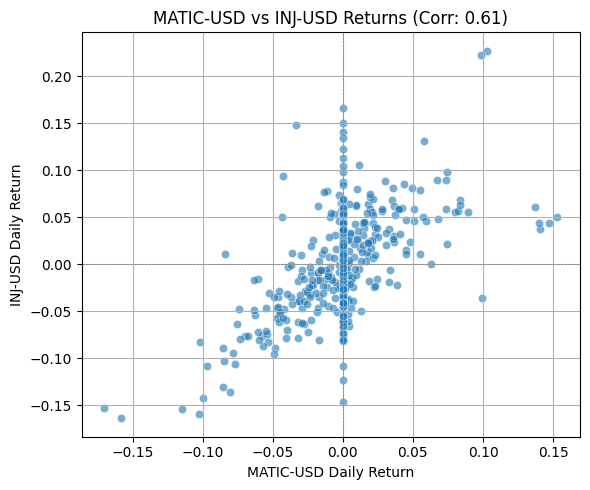

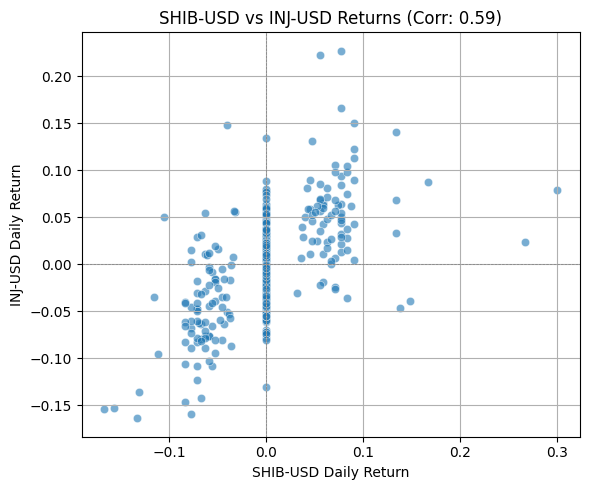

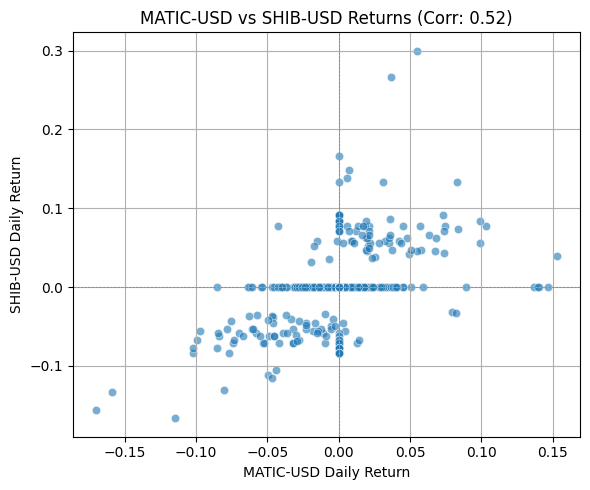

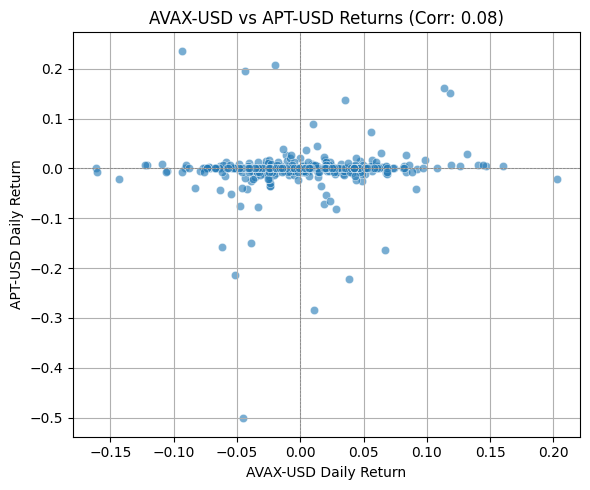

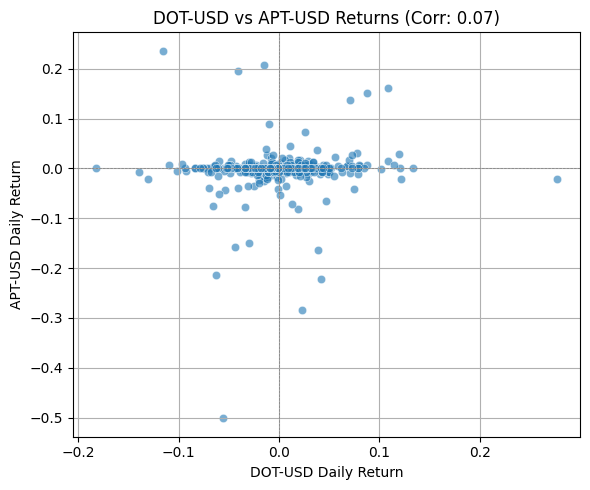

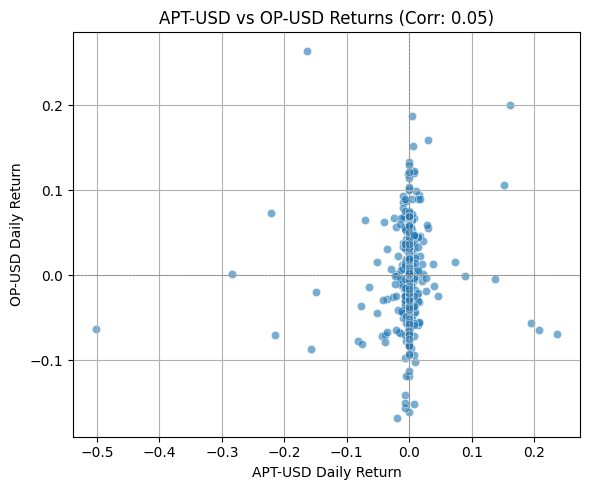

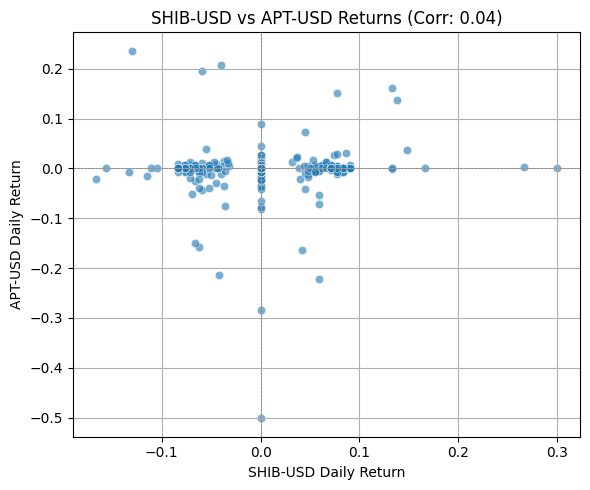

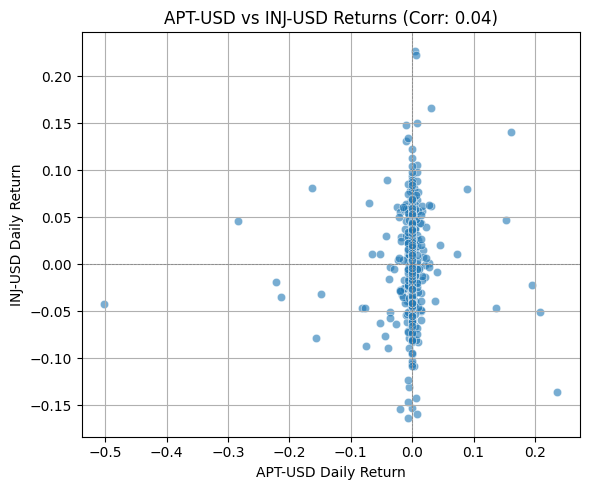

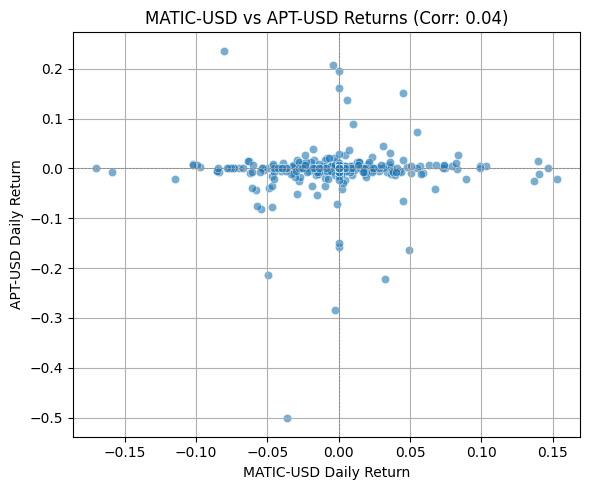

In [2]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

tickers = ['AVAX-USD', 'DOT-USD', 'MATIC-USD', 'SHIB-USD', 'APT-USD', 'INJ-USD', 'OP-USD']

# Download data
def get_crypto_data(tickers, start="2024-07-01", end="2025-07-20"):
    return yf.download(tickers, start=start, end=end, group_by='ticker', interval="1d", auto_adjust=False)

raw_data = get_crypto_data(tickers)

# Extract Close prices
close_prices = pd.DataFrame({ticker: raw_data[ticker]['Close'] for ticker in tickers})
daily_returns = close_prices.pct_change().dropna()

# Limit to avoid too many plots
top_n_pairs = 49  # You can increase this

# Compute correlation matrix
corr_matrix = daily_returns.corr()

# Get top most negatively and positively correlated pairs
pairs = []
for (a, b) in itertools.combinations(tickers, 2):
    corr = corr_matrix.loc[a, b]
    pairs.append(((a, b), corr))

# Sort by absolute correlation (strongest relationships)
sorted_pairs = sorted(pairs, key=lambda x: abs(x[1]), reverse=True)[:top_n_pairs]

# Plot individual scatter plots
for (ticker1, ticker2), corr_value in sorted_pairs:
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=daily_returns[ticker1], y=daily_returns[ticker2], alpha=0.6)
    plt.title(f"{ticker1} vs {ticker2} Returns (Corr: {corr_value:.2f})")
    plt.xlabel(f"{ticker1} Daily Return")
    plt.ylabel(f"{ticker2} Daily Return")
    plt.grid(True)
    plt.tight_layout()
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
    plt.show()
